# Project 2 TAA

## Expression Recognition with Keras

### Load datasets from file

In [25]:
#Import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#to load matlab mat files
from scipy.io import loadmat
# for neural network
import tensorflow as tf
from tensorflow import keras

# Kfold
from sklearn.model_selection import KFold

# Show images
from PIL import Image
import os

In [52]:
labelNames = ['Neutral', 'Happy', 'Sad', 'Surprise', 'Fear', 'Disgust', 'Anger', 'Contempt']

# Load Training data cropped
mat=loadmat(f"./datasets/crop/train/{'_'.join(labelNames)}.mat")
# mat is a dict with key "X" for x-values, and key "y" for y values
X_crop, y_crop = np.reshape(mat["X"],(mat["X"].shape[0],mat["X"].shape[1],mat["X"].shape[2],1)), mat["y"]

# Load Training data not cropped
mat=loadmat(f"./datasets/no_crop/train/{'_'.join(labelNames)}.mat")
# mat is a dict with key "X" for x-values, and key "y" for y values
X_nocrop, y_nocrop = mat["X"], mat["y"]

# Load Test data not cropped
mat=loadmat(f"./datasets/no_crop/test/{'_'.join(labelNames)}.mat")
# mat is a dict with key "X" for x-values, and key "y" for y values
X_nocrop_test, y_nocrop_test = mat["X"], mat["y"]

# Load Test data cropped
mat=loadmat(f"./datasets/crop/test/{'_'.join(labelNames)}.mat")
# mat is a dict with key "X" for x-values, and key "y" for y values
X_crop_test, y_crop_test = np.reshape(mat["X"], (mat["X"].shape[0],mat["X"].shape[1],mat["X"].shape[2],1)), mat["y"]


In [53]:
# numbers
m_crop = X_crop.shape[0] # number of training examples
m_nocrop = X_nocrop.shape[0]
m_crop_test = X_crop_test.shape[0]
m_nocrop_test = X_crop_test.shape[0]
labels = np.max(y_crop)+1 # number of labels
features = X_crop.shape[1:] # number of features per example

print(f"Loaded {m_crop} traing examples cropped and {m_nocrop} no cropped with {labels} labels ({int(m_crop/labels)} for each), each with {features} features (pixels).")
print("Labels are:", ', '.join(labelNames))

print(f"Loaded {m_crop_test} cropped for test and {m_nocrop_test} no cropped for test.")

print("X_crop.shape", X_crop.shape)

Loaded 9600 traing examples cropped and 9600 no cropped with 8 labels (1200 for each), each with (48, 48, 1) features (pixels).
Labels are: Neutral, Happy, Sad, Surprise, Fear, Disgust, Anger, Contempt
Loaded 1600 cropped for test and 1600 no cropped for test.
X_crop.shape (9600, 48, 48, 1)


### Some examples

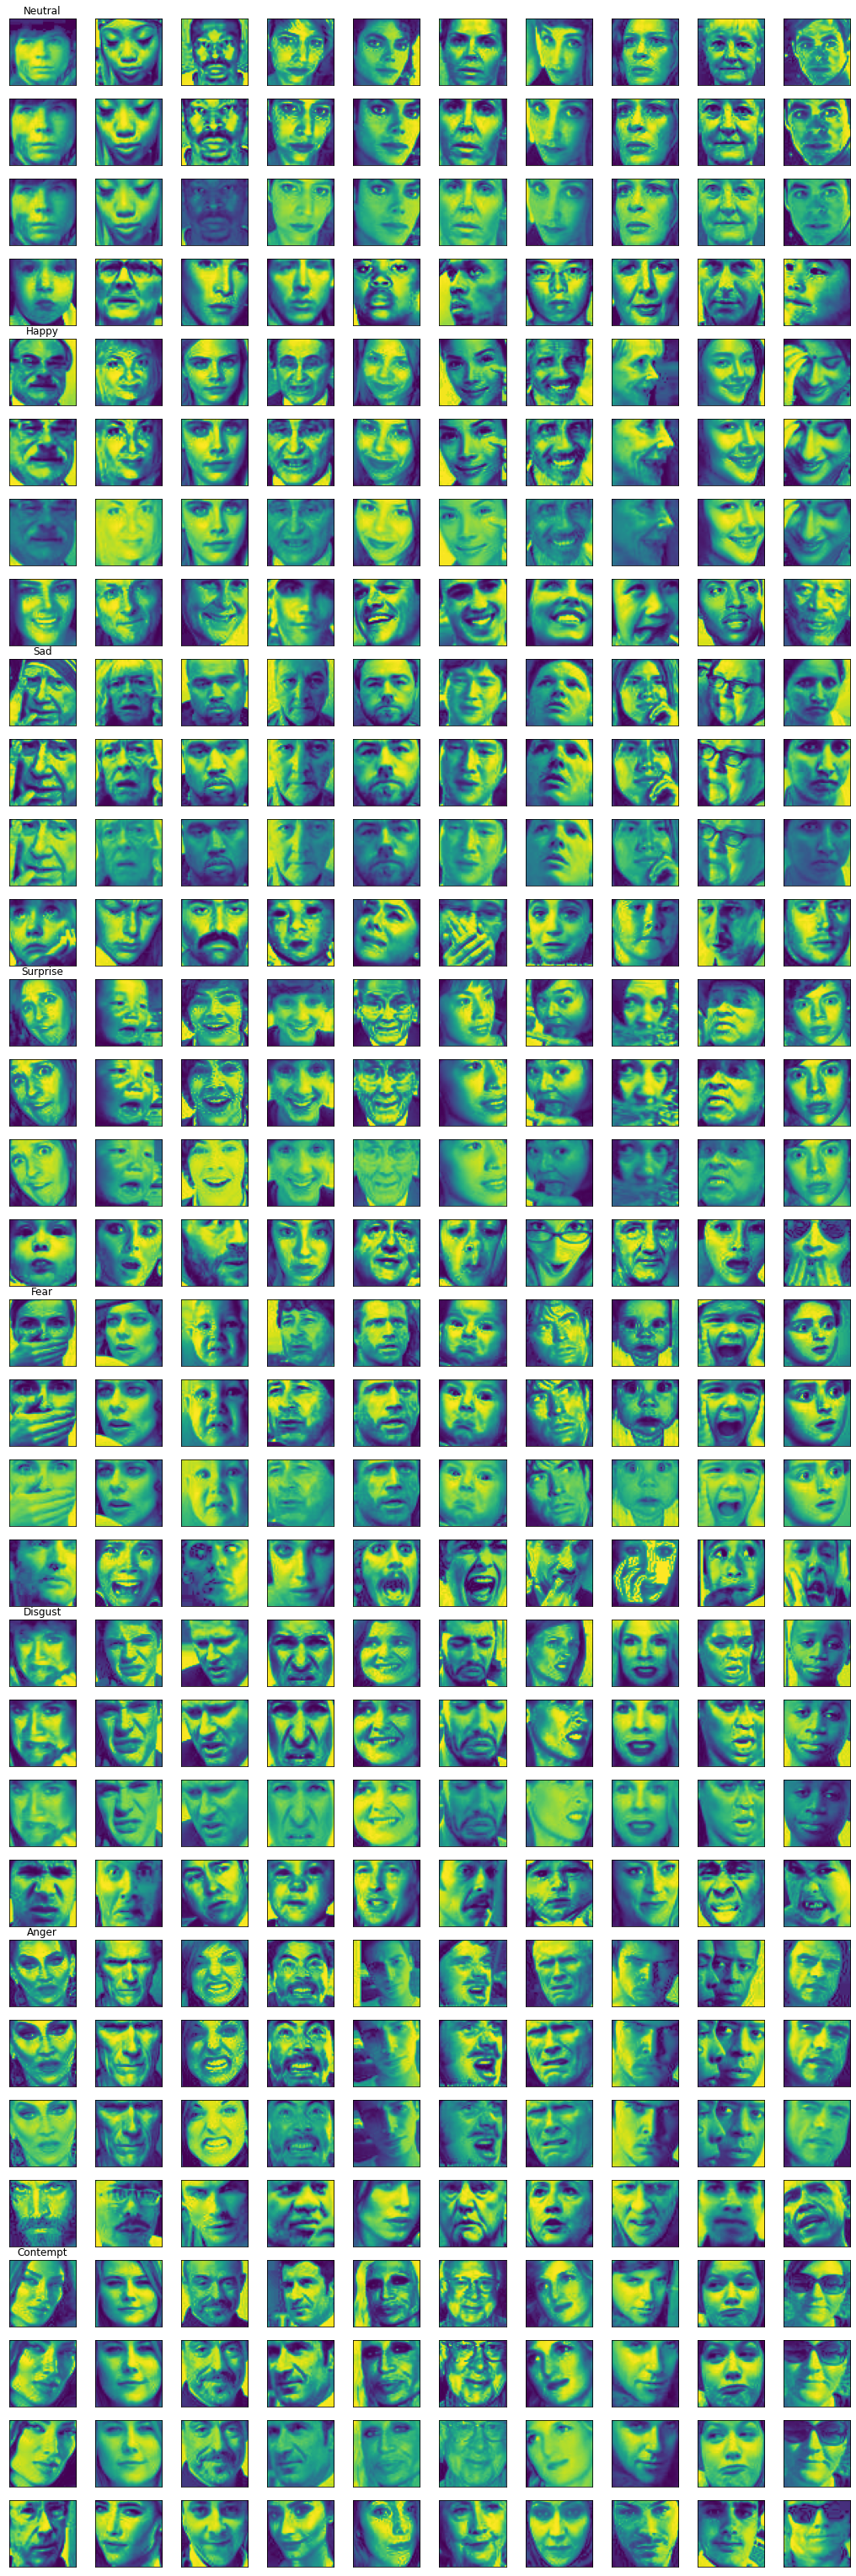

In [54]:
examplesNumber = 10

itera = 4

fig, axis = plt.subplots(labels*itera,examplesNumber,figsize=(18,6*labels))
fig.subplots_adjust(top=1)

# Foreach label, output 10 random images

for i in range(0, labels*itera, itera):
    
    entries_cropped = list(filter(lambda y: '_face' in y, sorted(os.listdir('./data/train_set/processed/' + labelNames[i//itera]), key=lambda x:int(x.split('.')[0].split('_')[0]))))
    
    for j in range(0, 10):
        # Show image
        axis[i,j].imshow(X_nocrop[int((m_nocrop/labels)*(i//itera)+j),:])
        axis[i+1,j].imshow(X_crop[int((m_crop/labels)*(i//itera)+j),:])
        axis[i+2,j].imshow(Image.open('./data/train_set/processed/' + labelNames[i//itera] + '/' + entries_cropped[j]).convert('L'))
        axis[i+3,j].imshow(X_crop_test[int((m_crop_test/labels)*(i//itera)+j),:])
        # Hide axes
        axis[i,j].set_xticks([])
        axis[i,j].set_yticks([])
        axis[i+1,j].set_xticks([])
        axis[i+1,j].set_yticks([])
        axis[i+2,j].set_xticks([])
        axis[i+2,j].set_yticks([])
        axis[i+3,j].set_xticks([])
        axis[i+3,j].set_yticks([])
        # Display title only on first
        if j==0:
            axis[i,j].set_title(labelNames[i//itera])

In [35]:
def create_model():
    
    if True: # https://github.com/sandy-lee/mnist_neural_net/blob/master/src/mnist_neural_net.ipynb
        model = keras.models.Sequential([keras.layers.Conv2D(64, 7, activation="relu", padding= "same", input_shape=[X_crop.shape[1], X_crop.shape[1], 1]),
             keras.layers.MaxPooling2D(2),
             keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
             keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
             keras.layers.MaxPooling2D(2),
             keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
             keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
             keras.layers.MaxPooling2D(2),
             keras.layers.Flatten(),
             keras.layers.Dense(128, activation="relu"),
             keras.layers.Dense(64, activation="relu"),
             keras.layers.Dense(10, activation="softmax")
         ])
    return model

In [36]:
#model.summary()

In [37]:
#model.compile(loss = "sparse_categorical_crossentropy", optimizer = "sgd",metrics = ["accuracy"])                 

In [56]:
print(X_crop_test.shape)
print(y_crop_test.shape)

(1600, 48, 48, 1)
(1600, 1)


In [ ]:
kFold = KFold(n_splits=10) # 1200/4 = 300 https://datascience.stackexchange.com/a/28159

historicalData = []

# https://machinelearningmastery.com/evaluate-performance-deep-learning-models-keras/
for train, test in kFold.split(X_crop, y_crop):
    print("train", train)
    print("test", test)
   
    # Create model and compile
    print(X_crop.shape)
    model= create_model()
    model.compile(loss = "sparse_categorical_crossentropy", optimizer = "sgd",metrics = ["accuracy"])
    history = model.fit(X_crop[train], y_crop[train], epochs = 1)
    scores = model.evaluate(X_crop[test], y_crop[test])
    
    # Evaluate for test data
    evaluate = model.evaluate(X_crop_test, y_crop_test, return_dict=True)
    
    print("Score", scores[1] * 100)
    
    # Save metrics for further usage
    historicalData.append({
        'train': train,
        'test': test,
        'history': history,
        'scores': scores,
        'cvscore': scores[1] * 100,
        'evaluate': evaluate
    })
    
    # Output some feedback
    print("Evaluation", evaluate)
    
print("Finished!")   

train [ 960  961  962 ... 9597 9598 9599]
test [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234

50/50 [==============================] - 10s 193ms/step - loss: 2.1052 - accuracy: 0.1312
Score 0.0
Evaluation {'loss': 2.1051557064056396, 'accuracy': 0.13124999403953552}
train [   0    1    2 ... 9597 9598 9599]
test [1920 1921 1922 1923 1924 1925 1926 1927 1928 1929 1930 1931 1932 1933
 1934 1935 1936 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946 1947
 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961
 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975
 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989
 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019 2020 2021 2022 2023 2024 2025 2026 2027 2028 2029 2030 2031
 2032 2033 2034 2035 2036 2037 2038 2039 2040 2041 2042 2043 2044 2045
 2046 2047 2048 2049 2050 2051 2052 2053 2054 2055 2056 2057 2058 2059
 2060 2061 2062 2063 2064 2065 2066 2067 2068 2069 2070 2071 2072 2073

In [ ]:
cvscores = [h['cvscore'] for h in historicalData]

for h in historicalData:
    print("Accuracy", h['cvscore'])
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

In [ ]:
# See intermediate
# https://towardsdatascience.com/visualizing-intermediate-activation-in-convolutional-neural-networks-with-keras-260b36d60d0